In [25]:
import xarray as xr, pandas as pd, numpy as np, xoak
from statsmodels.nonparametric.smoothers_lowess import lowess

import cartopy, regionmask, geopandas as gpd

my_dir = "/home/jovyan/my_materials/"

# set the extent of the observational data
xn, xx, yn, yx = [5,20,40,55]

# Some useful extra arguments when plotting

Alternative colourmaps: https://matplotlib.org/stable/users/explain/colors/colormaps.html

In [ ]:
da = xr.open_dataset(my_dir+"era5_tmax_daily_eu_5-20E_40-55N_firstyear-lastyear_su.nc").tmax

# cut out just the time slice we're interested in
da_event = da.sel(time = slice("2024-07-01","2024-07-10"))

In [ ]:
Useful arguments when plotting:  
`vmin` and `vmax`: set max & min values on colour scale (useful to highlight values other than the absolute maximum & minimum)  
`subplot_kws = {"extent" : (xn,yn,xx,yx)}`: fix the lon & lat in the figures

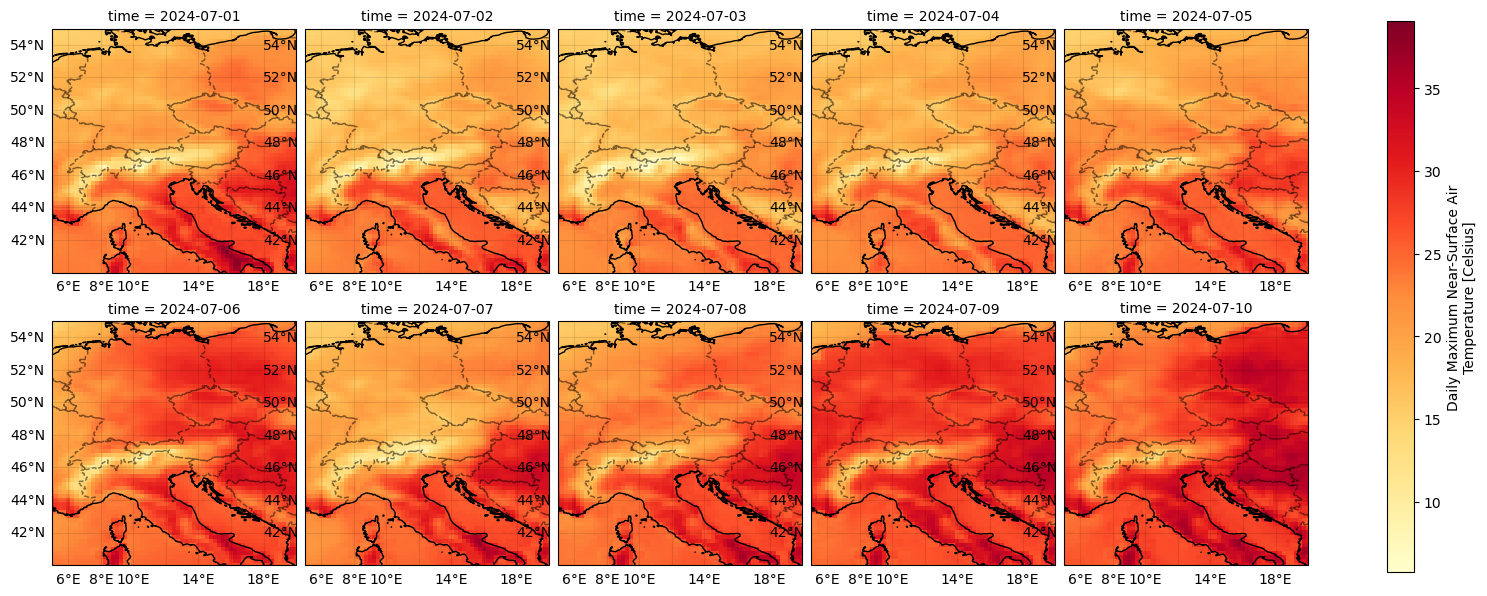

In [33]:
fig = da_event.plot(cmap = "YlOrRd",      # set the colourmap - "YlGnBu" is good for precip
                    col = "time",         # plot each day in a separate column
                    col_wrap = 5,         # plot 5 panels per row
                    vmin = 10,             # set range of values to plot
                    vmax = 35,             # set range of values to plot
                    subplot_kws = {"projection" : cartopy.crs.PlateCarree(),
                                   "extent" : (xn,xx,yn,yx)})    # set geographic projection so we can add geographic features

# add coastlines and borders
for ax in fig.axs.flat:
    ax.coastlines()
    ax.add_feature(cartopy.feature.BORDERS, alpha = 0.5, ls = "--")
    ax.gridlines(color = "k", alpha = 0.1, draw_labels = ["bottom", "left"])

# Loading and plotting river catchments from hydrobasins
 https://www.hydrosheds.org/products/hydrobasins

In [26]:
# NB. You need to save the different levels into separate files manually

In [27]:
da = xr.open_dataset(my_dir+"era5_tmax_daily_eu_5-20E_40-55N_firstyear-lastyear_su.nc").tmax

# cut out just the time slice we're interested in
da_event = da.sel(time = slice("2024-07-01","2024-07-10"))

In [28]:
# load the shapefile
hybas03 = gpd.read_file(my_dir+"hybas03")

# clip to the edges of your data
hybas03 = hybas03.clip((xn,yn,xx,yx))

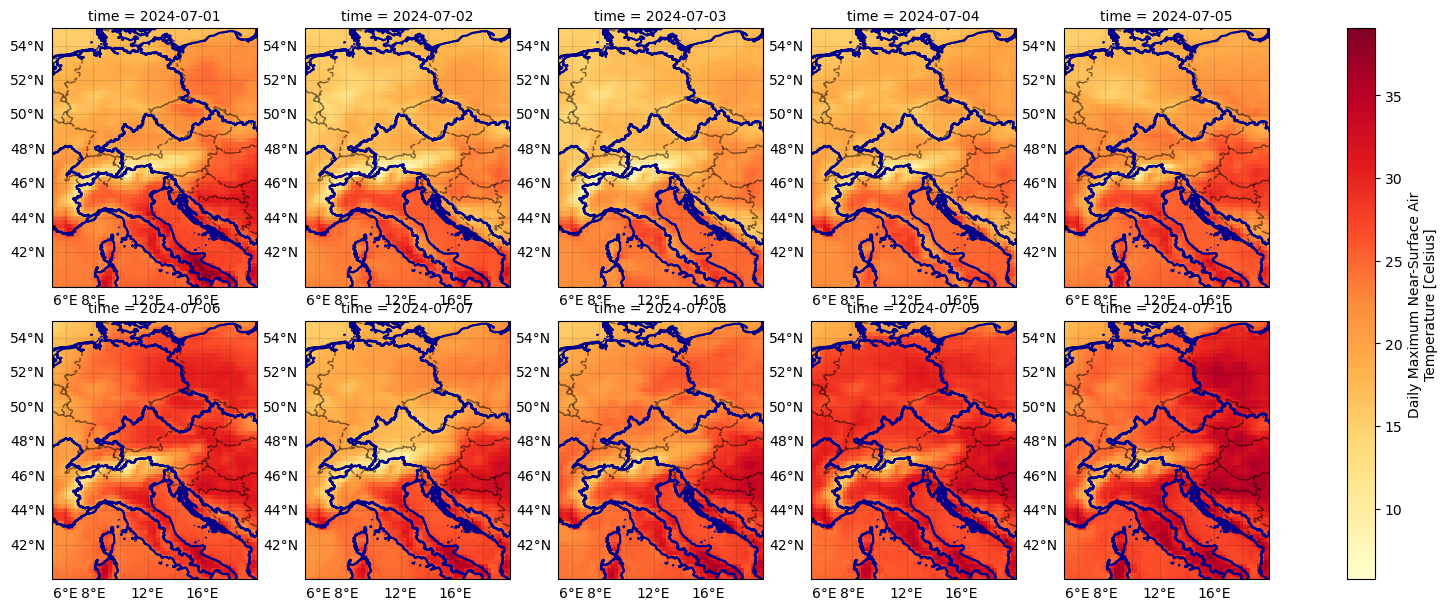

In [29]:
fig = da_event.plot(cmap = "YlOrRd",      # set the colourmap
                    col = "time",         # plot each day in a separate column
                    col_wrap = 5,         # plot 5 panels per row
                    subplot_kws = {"projection" : cartopy.crs.PlateCarree(),
                                   "extent" : (xn,xx,yn,yx)})    # set geographic projection so we can add geographic features

# add coastlines and borders
for ax in fig.axs.flat:
    ax.coastlines()
    ax.add_feature(cartopy.feature.BORDERS, alpha = 0.5, ls = "--")
    ax.gridlines(color = "k", alpha = 0.1, draw_labels = ["bottom", "left"])

    hybas03.boundary.plot(ax = ax, color = "darkblue")

Those regions are too large - try a higher level

In [30]:
# load the shapefile
hybas04 = gpd.read_file(my_dir+"hybas04")

# clip to the edges of your data
hybas04 = hybas04.clip((xn,yn,xx,yx))

In [ ]:
fig = da_event.plot(cmap = "YlOrRd",      # set the colourmap
                    col = "time",         # plot each day in a separate column
                    col_wrap = 5,         # plot 5 panels per row
                    subplot_kws = {"projection" : cartopy.crs.PlateCarree(),
                                   "extent" : (xn,xx,yn,yx)})    # set geographic projection so we can add geographic features

# add coastlines and borders
for ax in fig.axs.flat:
    ax.coastlines()
    ax.add_feature(cartopy.feature.BORDERS, alpha = 0.5, ls = "--")
    ax.gridlines(color = "k", alpha = 0.1, draw_labels = ["bottom", "left"])

    hybas04.boundary.plot(ax = ax, color = "darkblue")